In [4]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
model = tf.keras.models.load_model('trained_model.keras')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 512)               58982912  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
          

In [7]:
class_name = ['Actinic keratosis',
              'Atopic Dermatitis',
              'Benign keratosis',
              'Dermatofibroma',
              'Melanocytic nevus',
              'Melanoma',
              'Squamous cell carcinoma',
              'Tinea Ringworm Candidiasis',
              'Vascular lesion']


In [8]:
# Define disease descriptions
disease_info = {
    'Actinic keratosis': 'A rough, scaly patch on the skin caused by years of sun exposure.',
    'Atopic Dermatitis': 'A condition that makes your skin red and itchy. It is common in children but can occur at any age.',
    'Benign keratosis': 'A non-cancerous skin growth that originates in the keratinocytes.',
    'Dermatofibroma': 'A common benign fibrous nodule that most often arises on the skin of the lower legs.',
    'Melanocytic nevus': 'A benign skin growth caused by melanocyte cell clusters. Most are harmless but should be monitored for changes.',
    'Melanoma': 'The most serious type of skin cancer, develops in the cells that produce melanin.',
    'Squamous cell carcinoma': 'A common form of skin cancer that develops in the squamous cells.',
    'Tinea Ringworm Candidiasis': 'A fungal infection of the skin or nails caused by dermatophytes.',
    'Vascular lesion': 'An abnormality of the skin and underlying tissues, usually due to a blood vessel malformation.'
}

Absolute Path: c:\Users\DELL\OneDrive\Desktop\MATERIALUI\skin_disease_detection\val\Melanoma\ISIC_0000550.jpg


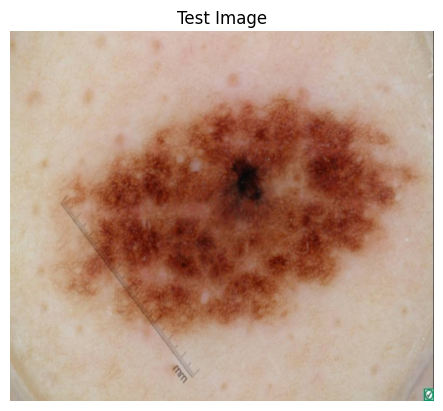

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Use os.path.join for cross-platform compatibility
image_path = os.path.join("val", "Melanoma", "ISIC_0000550.jpg")

# Debug: Check absolute path
print("Absolute Path:", os.path.abspath(image_path))

# Check if file exists
if not os.path.exists(image_path):
    print(f"Error: The file does not exist at {os.path.abspath(image_path)}")
else:
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Could not read the image. Check the file format and path.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
        plt.title("Test Image")
        plt.axis("off")  # Hide axis
        plt.show()


In [26]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 256, 256, 3)


In [27]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 208ms/step


(array([[2.0433219e-04, 7.6868373e-04, 3.8070808e-04, 5.8862934e-05,
         4.0629917e-01, 5.9169453e-01, 4.1338737e-04, 1.1187942e-04,
         6.8337053e-05]], dtype=float32),
 (1, 9))

In [28]:
result_index = np.argmax(prediction)
result_index

5

In [29]:
confidence_score = np.max(prediction) * 100
confidence_score

59.169453382492065

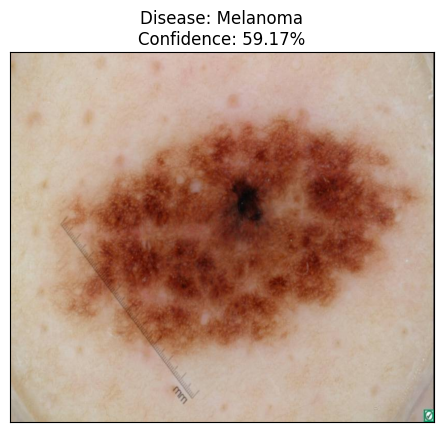

In [30]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Disease: {model_prediction}\nConfidence: {confidence_score:.2f}%')
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
model_prediction

'Melanoma'

In [32]:
disease_info = {
    'Actinic keratosis': 'A rough, scaly patch on the skin caused by years of sun exposure.',
    'Atopic Dermatitis': 'A condition that makes your skin red and itchy. It is common in children but can occur at any age.',
    'Benign keratosis': 'A non-cancerous skin growth that originates in the keratinocytes.',
    'Dermatofibroma': 'A common benign fibrous nodule that most often arises on the skin of the lower legs.',
    'Melanocytic nevus': 'A melanocytic nevus (mole) is a benign skin growth caused by melanocyte cell clusters. Most are harmless but should be monitored for changes. Treatment includes monitoring, laser therapy, or surgical removal if suspicious or for cosmetic reasons. If a mole shows irregular shape, color changes, or rapid growth, consult a dermatologist.',
    'Melanoma': 'The most serious type of skin cancer, develops in the cells that produce melanin.',
    'Squamous cell carcinoma': 'A common form of skin cancer that develops in the squamous cells that make up the middle and outer layer of the skin.',
    'Tinea Ringworm Candidiasis': 'A fungal infection of the skin or nails caused by dermatophytes.',
    'Vascular lesion': 'An abnormality of the skin and underlying tissues, usually due to a blood vessel malformation.'
}

disease_description = disease_info.get(model_prediction, "No information available")
print(f"Disease Name: {model_prediction}")
print(f"Description: {disease_description}")
print(f'Model Accuracy Score: {confidence_score:.2f}%')

Disease Name: Melanoma
Description: The most serious type of skin cancer, develops in the cells that produce melanin.
Model Accuracy Score: 59.17%
